<a href="https://colab.research.google.com/github/manishwai/Maximizing-Revenue-Python-Project/blob/main/Maximing_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(r'https://query.data.world/s/3khby62ngibaunzlthtrfcdf2vo6kw?dws=00000')

<ipython-input-3-6bd8b2ebcc59>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'https://query.data.world/s/3khby62ngibaunzlthtrfcdf2vo6kw?dws=00000')


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [ ]:
df.shape

(6405008, 18)

Change The datatype of date columns

In [ ]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Make a new column Duration

In [ ]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']


In [ ]:
df['duration in mins']=df['duration'].dt.total_seconds()/60

In [ ]:
df['duration in mins']=df['duration in mins'].round(2)

In [ ]:
df['duration in mins']

0           4.80
1           7.42
2           6.18
3           4.85
4           2.30
           ...  
6405003    31.00
6405004    76.00
6405005    27.83
6405006    22.65
6405007    22.00
Name: duration in mins, Length: 6405008, dtype: float64

In [ ]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration in mins']]

Checkf  for missing values

In [ ]:
df.isnull().sum()

passenger_count     65441
payment_type        65441
fare_amount             0
trip_distance           0
duration in mins        0
dtype: int64

Removing Empty Rows


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['passenger_count']=df['passenger_count'].astype(int)



In [ ]:
df['payment_type']=df['payment_type'].astype(int)

Check for duplicated Data

In [ ]:
df.drop_duplicates(inplace=True)

### **Detecting Outliers**

In [ ]:
df['passenger_count'].value_counts(normalize=True)


passenger_count
1    0.717277
2    0.149288
3    0.039472
5    0.035601
6    0.020846
4    0.019476
0    0.018030
7    0.000005
9    0.000003
8    0.000003
Name: proportion, dtype: float64

In [ ]:
df['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

# Removing Outliers

In [ ]:
df=df[df['payment_type']<3]


In [ ]:
df=df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [ ]:
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration in mins
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260032e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770370e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.880000e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573000e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.337000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525120e+03


Above describe shows that data still has outliers 3 columsn were having values in negative so we have to filter that as well

In [ ]:
df=df[df['fare_amount']>0]
df =df[df['trip_distance'] >0]
df=df[df['duration in mins'] >0]

{'whiskers': [<matplotlib.lines.Line2D at 0x78729a7fa500>,
 'caps': [<matplotlib.lines.Line2D at 0x78729a7fa920>,
 'boxes': [<matplotlib.lines.Line2D at 0x78729a7fa140>],
 'medians': [<matplotlib.lines.Line2D at 0x78729a7fae60>],
 'fliers': [<matplotlib.lines.Line2D at 0x78729a7fb100>],
 'means': []}

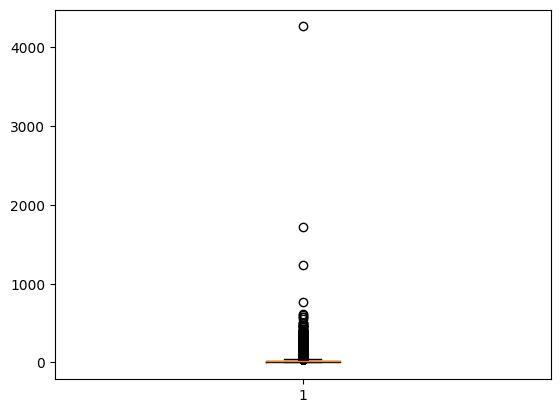

In [ ]:
plt.boxplot(df['fare_amount'])

We can see that fare amount column have extreme values as outliers such as 4000 we can remove them this can be due to inter city travel

Calculating IQR

In [ ]:
for col in ['fare_amount','trip_distance','duration in mins']:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df=df[(df[col]>lower_limit)&(df[col]<upper_limit)]

# Visualization

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked',bins=20, edgecolor='k', color='r',label='Card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked',bins=20, edgecolor='k', color='b' , label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked',bins=20, edgecolor='k', color='r',label='Card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked',bins=20, edgecolor='k', color='b' , label='Cash')
plt.legend()
plt.show()

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','median','std'],'trip_distance' : ['mean','median','std']}).reset_index()

payment_type fare_amount                  trip_distance                 
                      mean median       std          mean median       std
0         card   13.096503   12.0  5.831808      2.986372   2.48  1.985248
1         cash   11.745393   10.5  5.597290      2.597434   2.03  1.906750

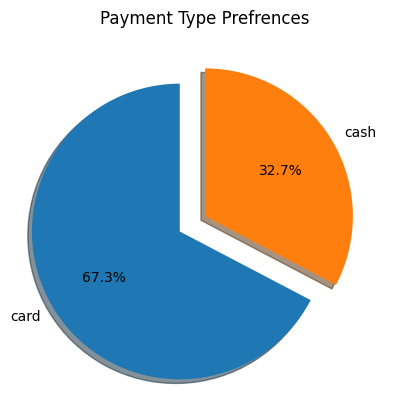

In [ ]:
plt.title('Payment Type Prefrences')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,autopct='%1.1f%%',startangle=90,shadow=True,explode=[0.2,0] )
plt.show()

# Impact of Passenger count on payment type

In [ ]:
perc_count=df.groupby(['payment_type','passenger_count'])['passenger_count'].count()


In [ ]:
perc_count = perc_count.to_frame()


In [ ]:
perc_count.rename(columns={'passenger_count': 'count'}, inplace=True)
perc_count.reset_index(inplace=True)

In [ ]:
perc_count['percentage']=perc_count['count']/perc_count['count'].sum()*100

In [ ]:
df1=pd.DataFrame(columns=[1,2,3,4,5])


In [ ]:
df1['payment_type']=['card','cash']


In [ ]:
col = list(df1.columns)

In [ ]:
new_order = col[-1:] + col[:-1]
df1 = df1[new_order]

In [ ]:
df1.iloc[0,1:]=perc_count.iloc[0:5,-1]
df1.iloc[1,1:]=perc_count.iloc[5:,-1]

In [ ]:
df1

,payment_type,1,2,3,4,5
0,card,39.553452,14.263573,5.329215,2.77203,5.399349
1,cash,20.042516,6.769094,2.373138,1.424502,2.073131


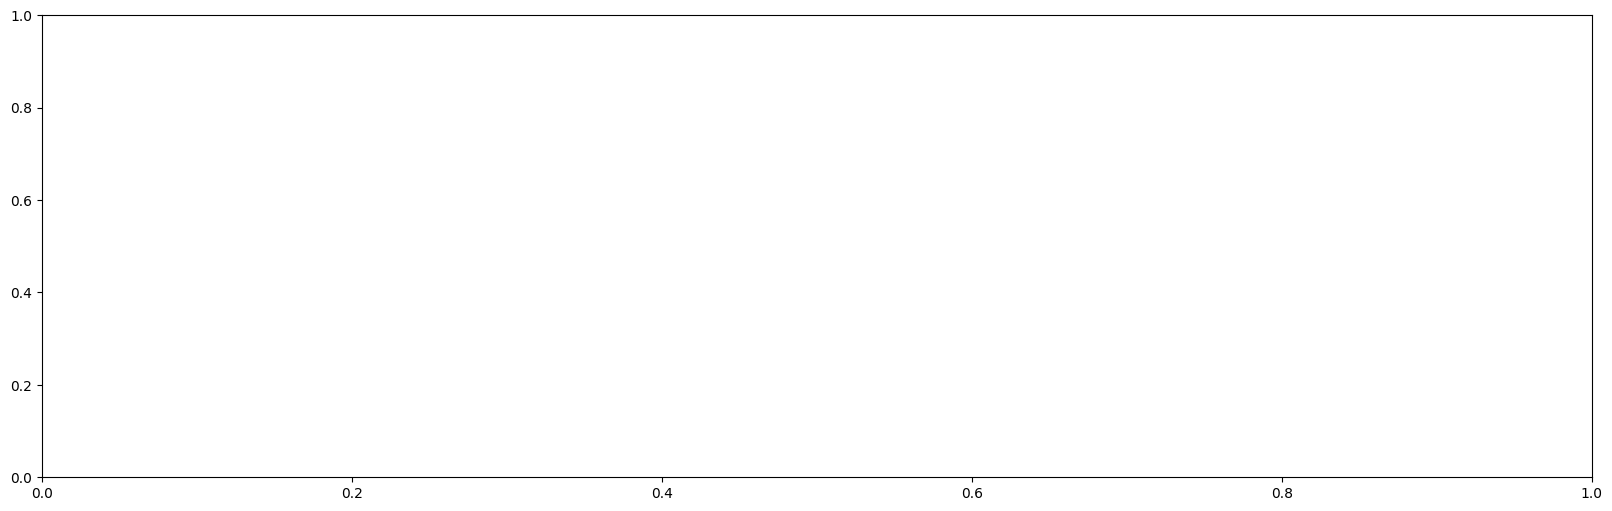

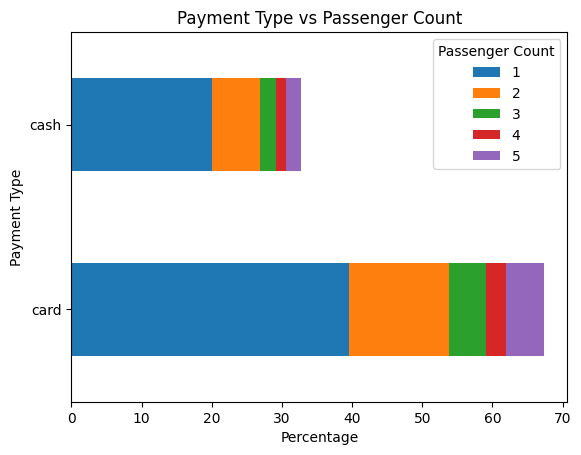

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(kind='barh',x='payment_type',stacked=True)
plt.title('Payment Type vs Passenger Count')
plt.xlabel('Percentage')
plt.ylabel('Payment Type')
plt.legend(title='Passenger Count')
# Add percentage text
for p in ax.patches:
    # Get width, height, and coordinates of each bar
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    ax.text(x + width/2, y + height/2,
            '{:.0f}%'.format(width),  # Format width as percentage
            ha='center', va='center',  # Center align text horizontally and vertically
            color='white')


plt.show()

# Hypothesis Testing

Null hypothesis: There is no difference in average fare between custor(iefs)who use credit cards and customers who use cash

Alternative hypothesis: There is a difference in average fare between customers who use credit cards and customers who use cash


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats


In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration in mins
0,1,card,6.0,1.20,4.80
1,1,card,7.0,1.20,7.42
2,1,card,6.0,0.60,6.18
3,1,card,5.5,0.80,4.85
5,1,cash,2.5,0.03,0.88
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.38
6339555,3,card,10.0,2.09,14.80
6339561,1,card,17.5,4.11,21.50
6339563,1,card,13.0,2.13,19.00


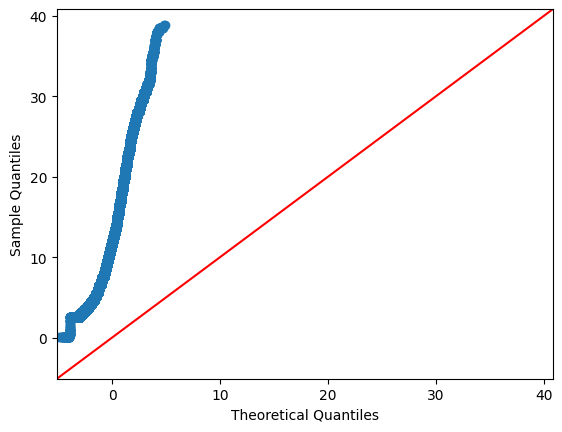

In [ ]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [ ]:
card_sample=df[df['payment_type']=='card']['fare_amount']
cash_sample=df[df['payment_type']=='cash']['fare_amount']

In [ ]:
t_stats,p_value=stats.ttest_ind(card_sample,cash_sample)